In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/epoch-23/sample_submission.csv
/kaggle/input/epoch-23/train.csv
/kaggle/input/epoch-23/test.csv


# Importing Libraries

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the Dataset

In [3]:
df = pd.read_csv('/kaggle/input/epoch-23/train.csv')
df.head()

,restaurant_id,online_order,reservations,rating,votes,location,rest_type,cuisines,reviews_list,menu_item,type,locality,cost
0,6d99d335-6ef0-44e8-affa-8e522bbc6a12,No,Not available,4.6,979,MG Road,Fine Dining,Thai,"[('Rated 5.0', ""RATED\n When lots of options ...",[],Buffet,Indiranagar,3.0
1,0813b101-313a-45fe-9c4b-1ee2c6fdb33d,No,Available,4.2,3116,Lavelle Road,Lounge,Continental,"[('Rated 4.0', 'RATED\n Had been here on a or...",[],Dine-out,Brigade Road,2.5
2,315a10d1-f3b8-4484-873d-40765594cf14,Yes,Available,4.5,418,Kammanahalli,Casual Dining,"Asian, European, Italian, Korean, Malaysian, T...","[('Rated 4.0', 'RATED\n ValentineÃ\x83Ã\x83...",['Bangkok Style Raw Papaya Salad with Green Ap...,Dine-out,Kalyan Nagar,1.2
3,c451416e-dd60-44b1-a9f0-dbc6cb456637,Yes,Not available,3.9,241,Koramangala 4th Block,Quick Bites,"Pizza, Italian","[('Rated 4.0', ""RATED\n Simple food, no fanci...","['P-68 Masala Cheese Garlic Bread', 'P-65 Nach...",Dine-out,Koramangala 4th Block,600.0
4,11c34543-2491-4494-8224-3596308bc169,Yes,Not available,4.3,658,Cunningham Road,"Cafe, Dessert Parlor","Cafe, Desserts","[('Rated 4.0', 'RATED\n Nice and calm place.\...","['Veggie Supreme Pizza', 'Pesto Pasta', 'Newyo...",Cafes,Residency Road,750.0


# Exploratory Data Analysis and Feature Engineering

In [4]:
df.shape

(39516, 13)

In [5]:
df.describe()

,rating,votes,cost
count,39516.000000,39516.000000,39516.000000
mean,3.731719,298.037959,361.157549
std,0.411471,825.332006,230.305787
min,1.800000,0.000000,1.000000
25%,3.500000,9.000000,200.000000
50%,3.800000,47.000000,350.000000
75%,4.000000,212.000000,500.000000
max,4.900000,16832.000000,950.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39516 entries, 0 to 39515
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  39516 non-null  object 
 1   online_order   39516 non-null  object 
 2   reservations   39516 non-null  object 
 3   rating         39516 non-null  float64
 4   votes          39516 non-null  int64  
 5   location       39516 non-null  object 
 6   rest_type      39516 non-null  object 
 7   cuisines       39516 non-null  object 
 8   reviews_list   39516 non-null  object 
 9   menu_item      39516 non-null  object 
 10  type           39516 non-null  object 
 11  locality       39516 non-null  object 
 12  cost           39516 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB


In [7]:
df.isnull().sum()

restaurant_id    0
online_order     0
reservations     0
rating           0
votes            0
location         0
rest_type        0
cuisines         0
reviews_list     0
menu_item        0
type             0
locality         0
cost             0
dtype: int64

Hence, there are no missing values in the dataset

### Label encoding of online_order and reservations

In [8]:
from sklearn.preprocessing import LabelEncoder
lbenc = LabelEncoder()

In [9]:
df['online_order_encoded']=lbenc.fit_transform(df['online_order'])

df['online_order_encoded']

0        0
1        0
2        1
3        1
4        1
        ..
39511    0
39512    0
39513    0
39514    0
39515    0
Name: online_order_encoded, Length: 39516, dtype: int64

In [10]:
# Define custom labels and create a mapping dictionary
label_mapping = {'Not available': 0, 'Available': 1}

# Apply label encoding using map
df['reservations_encoded'] = df['reservations'].map(label_mapping)

In [11]:
df['reservations_encoded']

0        0
1        1
2        1
3        0
4        0
        ..
39511    0
39512    0
39513    0
39514    0
39515    0
Name: reservations_encoded, Length: 39516, dtype: int64

### Label encoding of locality

In [12]:
labelencode_x=LabelEncoder()

In [13]:
df['locality_encoded']=labelencode_x.fit_transform(df['locality'])

df['locality_encoded'].unique

<bound method Series.unique of 0        11
1         5
2        14
3        16
4        27
         ..
39511    12
39512     0
39513    23
39514    23
39515    22
Name: locality_encoded, Length: 39516, dtype: int64>

In [14]:
df['type_encoded']=labelencode_x.fit_transform(df['type'])

df['type_encoded'].unique

<bound method Series.unique of 0        0
1        4
2        4
3        4
4        1
        ..
39511    4
39512    3
39513    4
39514    2
39515    4
Name: type_encoded, Length: 39516, dtype: int64>

### Encoding Cuisines

In [15]:
# getting the unique cuisines present in the dataset.
unique_cuisines = set()
for cuisines_list in df['cuisines']:
    unique_cuisines.update(cuisines_list)

# Now unique_cuisines contains all unique cuisine types

In [16]:
# Assign a unique code to each cuisine. You can use a dictionary to map cuisines to codes.
cuisine_codes = {cuisine: code for code, cuisine in enumerate(unique_cuisines)}

In [17]:
df['cuisine_codes'] = df['cuisines'].apply(lambda x: [cuisine_codes[cuisine] for cuisine in x])

In [18]:
df['cuisine_codes']

0                                          [42, 19, 7, 46]
1                 [0, 1, 47, 22, 46, 47, 4, 47, 22, 7, 35]
2        [23, 13, 46, 7, 47, 38, 48, 9, 14, 26, 1, 36, ...
3        [10, 46, 25, 25, 7, 38, 48, 32, 22, 7, 35, 46,...
4        [0, 7, 28, 4, 38, 48, 34, 4, 13, 13, 4, 26, 22...
                               ...                        
39511    [3, 1, 26, 22, 19, 48, 32, 47, 6, 46, 7, 47, 3...
39512    [32, 24, 4, 48, 0, 26, 4, 7, 5, 38, 48, 34, 4,...
39513         [3, 1, 26, 22, 19, 48, 32, 47, 6, 46, 7, 47]
39514        [12, 1, 14, 22, 19, 48, 32, 47, 6, 46, 7, 47]
39515    [12, 1, 14, 22, 19, 48, 32, 47, 6, 46, 7, 47, ...
Name: cuisine_codes, Length: 39516, dtype: object

### Encoding Cost

In [19]:
df['cost_encoded'] = df['cost'].apply(lambda x: x * 1000 if x < 10 else x)

# Feature Engineering

Creating a new Feature called menu_count, which includes number of dishes/variety in the menu

In [20]:
df['menu_count']=df['menu_item'].apply(len)-2

In [21]:
df.head()

,restaurant_id,online_order,reservations,rating,votes,location,rest_type,cuisines,reviews_list,menu_item,type,locality,cost,online_order_encoded,reservations_encoded,locality_encoded,type_encoded,cuisine_codes,cost_encoded,menu_count
0,6d99d335-6ef0-44e8-affa-8e522bbc6a12,No,Not available,4.6,979,MG Road,Fine Dining,Thai,"[('Rated 5.0', ""RATED\n When lots of options ...",[],Buffet,Indiranagar,3.0,0,0,11,0,"[42, 19, 7, 46]",3000.0,0
1,0813b101-313a-45fe-9c4b-1ee2c6fdb33d,No,Available,4.2,3116,Lavelle Road,Lounge,Continental,"[('Rated 4.0', 'RATED\n Had been here on a or...",[],Dine-out,Brigade Road,2.5,0,1,5,4,"[0, 1, 47, 22, 46, 47, 4, 47, 22, 7, 35]",2500.0,0
2,315a10d1-f3b8-4484-873d-40765594cf14,Yes,Available,4.5,418,Kammanahalli,Casual Dining,"Asian, European, Italian, Korean, Malaysian, T...","[('Rated 4.0', 'RATED\n ValentineÃ\x83Ã\x83...",['Bangkok Style Raw Papaya Salad with Green Ap...,Dine-out,Kalyan Nagar,1.2,1,1,14,4,"[23, 13, 46, 7, 47, 38, 48, 9, 14, 26, 1, 36, ...",1200.0,3807
3,c451416e-dd60-44b1-a9f0-dbc6cb456637,Yes,Not available,3.9,241,Koramangala 4th Block,Quick Bites,"Pizza, Italian","[('Rated 4.0', ""RATED\n Simple food, no fanci...","['P-68 Masala Cheese Garlic Bread', 'P-65 Nach...",Dine-out,Koramangala 4th Block,600.0,1,0,16,4,"[10, 46, 25, 25, 7, 38, 48, 32, 22, 7, 35, 46,...",600.0,1574
4,11c34543-2491-4494-8224-3596308bc169,Yes,Not available,4.3,658,Cunningham Road,"Cafe, Dessert Parlor","Cafe, Desserts","[('Rated 4.0', 'RATED\n Nice and calm place.\...","['Veggie Supreme Pizza', 'Pesto Pasta', 'Newyo...",Cafes,Residency Road,750.0,1,0,27,1,"[0, 7, 28, 4, 38, 48, 34, 4, 13, 13, 4, 26, 22...",750.0,2076


In [22]:
df.columns

Index(['restaurant_id', 'online_order', 'reservations', 'rating', 'votes',
       'location', 'rest_type', 'cuisines', 'reviews_list', 'menu_item',
       'type', 'locality', 'cost', 'online_order_encoded',
       'reservations_encoded', 'locality_encoded', 'type_encoded',
       'cuisine_codes', 'cost_encoded', 'menu_count'],
      dtype='object')

### Cleaned Dataset

In [23]:
df_final = df.drop(['restaurant_id','online_order','reservations','location','rest_type','cuisines','reviews_list','menu_item','cost','type','locality'],axis=1)

In [24]:
df_final.head()

,rating,votes,online_order_encoded,reservations_encoded,locality_encoded,type_encoded,cuisine_codes,cost_encoded,menu_count
0,4.6,979,0,0,11,0,"[42, 19, 7, 46]",3000.0,0
1,4.2,3116,0,1,5,4,"[0, 1, 47, 22, 46, 47, 4, 47, 22, 7, 35]",2500.0,0
2,4.5,418,1,1,14,4,"[23, 13, 46, 7, 47, 38, 48, 9, 14, 26, 1, 36, ...",1200.0,3807
3,3.9,241,1,0,16,4,"[10, 46, 25, 25, 7, 38, 48, 32, 22, 7, 35, 46,...",600.0,1574
4,4.3,658,1,0,27,1,"[0, 7, 28, 4, 38, 48, 34, 4, 13, 13, 4, 26, 22...",750.0,2076


In [25]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'cuisine_codes' is the column you want to standardize
cuisine_codes = df_final['cuisine_codes'].tolist()

# Reshape the data to fit the MinMaxScaler
cuisine_codes_array = [item for sublist in cuisine_codes for item in sublist]
cuisine_codes_array = pd.Series(cuisine_codes_array).values.reshape(-1, 1)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
cuisine_codes_scaled = scaler.fit_transform(cuisine_codes_array)

# Replace the original 'cuisine_codes' column with the scaled values
df_final['cuisine_codes'] = df_final['cuisine_codes'].apply(lambda x: [cuisine_codes_scaled[i][0] for i in range(len(x))])

In [26]:
df_final['cuisine_codes_mean'] = df_final['cuisine_codes'].apply(lambda x: sum(x)/len(x))
df_final=df_final.drop(['cuisine_codes'],axis=1)

In [27]:
df_final.head()

,rating,votes,online_order_encoded,reservations_encoded,locality_encoded,type_encoded,cost_encoded,menu_count,cuisine_codes_mean
0,4.6,979,0,0,11,0,3000.0,0,0.581633
1,4.2,3116,0,1,5,4,2500.0,0,0.521336
2,4.5,418,1,1,14,4,1200.0,3807,0.552478
3,3.9,241,1,0,16,4,600.0,1574,0.520408
4,4.3,658,1,0,27,1,750.0,2076,0.520408


In [28]:
df_final.columns

Index(['rating', 'votes', 'online_order_encoded', 'reservations_encoded',
       'locality_encoded', 'type_encoded', 'cost_encoded', 'menu_count',
       'cuisine_codes_mean'],
      dtype='object')

# Correlation Heatmap

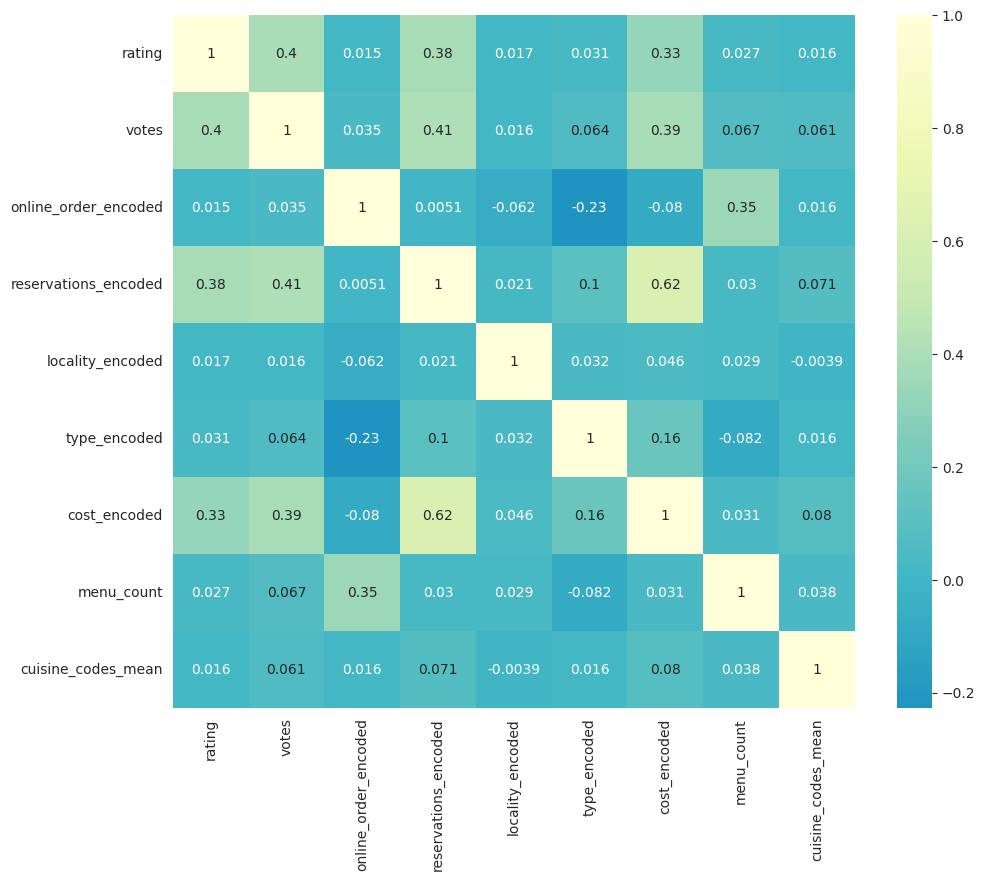

In [29]:
# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
plt.figure(figsize=(11,9))

#Heatmap
sns.heatmap(df_final.corr(), cmap=plt.cm.YlGnBu_r, center=0, annot=True)

plt.show()

## SEGREGATING VARIABLES:INDEPENDENT AND DEPENDENT VARIABLES


In [30]:
#segregating variables
x = df_final.drop(['cost_encoded'], axis=1)
y = df_final['cost_encoded']
x.shape, y.shape

((39516, 8), (39516,))

# SCALING THE DATA (USING MINMAX SCALER)

In [31]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
x=pd.DataFrame(x_scaled)

# SPLITTING THE DATASET

In [33]:
# Importing Train test split
from sklearn.model_selection import train_test_split
# Splitting into Train and Test Data sets
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 49)

# IMPLEMENTING THE MODELS

In [34]:
# Importing the models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from catboost import CatBoostRegressor

In [35]:
# Creating the models
lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=None)
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
sv_reg = SVR(C=1.0, epsilon=0.1, kernel='rbf')
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='uniform')
ls_reg = Lasso()
rd_reg = Ridge()
cb_reg = CatBoostRegressor(silent=True)

In [36]:
# Fitting the models
lr_reg.fit(train_x,train_y)
dt_reg.fit(train_x,train_y)
rf_reg.fit(train_x,train_y)
gb_reg.fit(train_x,train_y)
sv_reg.fit(train_x,train_y)
knn_reg.fit(train_x,train_y)
ls_reg.fit(train_x,train_y)
rd_reg.fit(train_x,train_y)
cb_reg.fit(train_x,train_y)

# Evaluation and Cross-Validation of the models

In [37]:
from sklearn.model_selection import cross_val_score, KFold

# Defining parameters for Cross-Validation
num_folds = 5
cv = KFold(n_splits=num_folds, shuffle=True, random_state=49)

# Creating a Cross-Validation Function
def cv_model(model, x, y):
    rmse_scores = cross_val_score(model, x, y, cv=cv, scoring='neg_root_mean_squared_error')
    return -rmse_scores.mean()

# Performing Cross-Validation for each model
results = []
models = ["Linear Regressor", "Decision Tree Regressor", "Random Forest Regressor", 
          "Gradient Boosting Regressor", "SVR", "KNN Regressor", "Lasso", "Ridge", "Cat Boost Regressor"]

for model, model_name in zip([lr_reg, dt_reg, rf_reg, gb_reg, sv_reg, knn_reg, ls_reg, rd_reg, cb_reg], models):
    rmse_scores_mean = cv_model(model, x, y)

    # Storing the Results
    results.append({
        "Model": model_name,
        "RMSE": rmse_scores_mean
    })

# Creating a dataframe to store the results
cv_df = pd.DataFrame(results)

In [38]:
cv_df

,Model,RMSE
0,Linear Regressor,333.752858
1,Decision Tree Regressor,244.887376
2,Random Forest Regressor,188.407701
3,Gradient Boosting Regressor,277.205744
4,SVR,347.657196
5,KNN Regressor,298.340163
6,Lasso,334.868296
7,Ridge,333.752779
8,Cat Boost Regressor,228.106577


Hence, random forest regressor is performing well. So, we will use this model.

### Predicting on test data set

In [39]:
# Fitting the model to Train Data
rf_reg.fit(train_x,train_y)
# Predicting on Test Data
test_pre = rf_reg.predict(test_x)
# Evaluation using RMSE:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
RMSE = np.sqrt(mse(test_y,test_pre))
RMSE

189.74589877702002

# Final Test

## Loading the Data

In [40]:
d = pd.read_csv('/kaggle/input/epoch-23/test.csv')
d.head()

,restaurant_id,online_order,reservations,rating,votes,location,rest_type,cuisines,reviews_list,menu_item,type,locality
0,aa540e8f-055d-4fd4-8127-efe6c1f5e8e7,No,Not available,3.9,0,Whitefield,Quick Bites,North Indian,[],[],Dine-out,Whitefield
1,ed6c18ab-3a15-41a5-bde7-264254cc1ef4,Yes,Not available,3.3,120,East Bangalore,Delivery,"Continental, Asian, Healthy Food, Burger, Biry...","[('Rated 4.0', 'RATED\n This is the one of my...",[],Delivery,Sarjapur Road
2,4e60f1e4-b4ca-4bc1-8540-006f349f65dc,No,Not available,4.2,843,Whitefield,Cafe,"Cafe, Italian, Continental","[('Rated 4.0', ""RATED\n First time visit to t...",[],Dine-out,Whitefield
3,fcf28310-1e85-48fd-9ec4-0613c7572983,No,Not available,3.0,24,Sarjapur Road,Quick Bites,"Biryani, North Indian, Chinese, Kerala","[('Rated 1.0', 'RATED\n Food not packed prope...",[],Dine-out,Sarjapur Road
4,3c9a06c8-3117-48f2-b0c9-f677923f6d89,No,Not available,3.9,0,Wilson Garden,Quick Bites,"Bakery, Beverages",[],[],Desserts,Koramangala 7th Block


In [41]:
d['online_order_encoded']=lbenc.fit_transform(d['online_order'])

d['online_order_encoded']

0       0
1       1
2       0
3       0
4       0
       ..
9874    1
9875    1
9876    0
9877    1
9878    0
Name: online_order_encoded, Length: 9879, dtype: int64

In [42]:
# Apply label encoding using map
d['reservations_encoded'] = d['reservations'].map(label_mapping)

In [43]:
d['reservations_encoded']

0       0
1       0
2       0
3       0
4       0
       ..
9874    0
9875    0
9876    0
9877    0
9878    0
Name: reservations_encoded, Length: 9879, dtype: int64

In [44]:
d['locality_encoded']=labelencode_x.fit_transform(d['locality'])

d['locality_encoded'].unique

<bound method Series.unique of 0       29
1       28
2       29
3       28
4       19
        ..
9874     0
9875    20
9876    13
9877    14
9878    21
Name: locality_encoded, Length: 9879, dtype: int64>

In [45]:
d['type_encoded']=labelencode_x.fit_transform(d['type'])

d['type_encoded'].unique

<bound method Series.unique of 0       4
1       2
2       4
3       4
4       3
       ..
9874    2
9875    4
9876    4
9877    0
9878    4
Name: type_encoded, Length: 9879, dtype: int64>

In [46]:
d['menu_count']=d['menu_item'].apply(len)-2

In [47]:
# getting the unique cuisines present in the dataset.
unique_cuisines = set()
for cuisines_list in d['cuisines']:
    unique_cuisines.update(cuisines_list)

# Now unique_cuisines contains all unique cuisine types

In [48]:
# Assign a unique code to each cuisine. You can use a dictionary to map cuisines to codes.
cuisine_codes = {cuisine: code for code, cuisine in enumerate(unique_cuisines)}

In [49]:
d['cuisine_codes'] = d['cuisines'].apply(lambda x: [cuisine_codes[cuisine] for cuisine in x])

In [50]:
d = d.drop(['restaurant_id','online_order','reservations','location','rest_type','cuisines','reviews_list','menu_item','type','locality'],axis=1)

In [51]:
xf = d

In [52]:
d

,rating,votes,online_order_encoded,reservations_encoded,locality_encoded,type_encoded,menu_count,cuisine_codes
0,3.9,0,0,0,29,4,0,"[2, 1, 26, 22, 19, 48, 32, 47, 6, 46, 7, 47]"
1,3.3,120,1,0,28,2,0,"[0, 1, 47, 22, 46, 47, 4, 47, 22, 7, 35, 38, 4..."
2,4.2,843,0,0,29,4,0,"[0, 7, 28, 4, 38, 48, 32, 22, 7, 35, 46, 7, 47..."
3,3.0,24,0,0,28,4,0,"[49, 46, 26, 16, 7, 47, 46, 38, 48, 2, 1, 26, ..."
4,3.9,0,0,0,19,3,0,"[49, 7, 36, 4, 26, 16, 38, 48, 49, 4, 17, 4, 2..."
...,...,...,...,...,...,...,...,...
9874,3.7,25,1,0,0,2,0,"[49, 7, 36, 4, 26, 16]"
9875,4.2,1770,1,0,20,4,1815,"[0, 1, 47, 22, 46, 47, 4, 47, 22, 7, 35, 38, 4..."
9876,3.9,4,0,0,13,4,0,"[3, 4, 40, 7, 40]"
9877,3.8,311,1,0,14,0,0,"[0, 1, 47, 22, 46, 47, 4, 47, 22, 7, 35, 38, 4..."


In [53]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'cuisine_codes' is the column you want to standardize
cuisine_codes = d['cuisine_codes'].tolist()

# Reshape the data to fit the MinMaxScaler
cuisine_codes_array = [item for sublist in cuisine_codes for item in sublist]
cuisine_codes_array = pd.Series(cuisine_codes_array).values.reshape(-1, 1)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
cuisine_codes_scaled = scaler.fit_transform(cuisine_codes_array)

# Replace the original 'cuisine_codes' column with the scaled values
d['cuisine_codes'] = d['cuisine_codes'].apply(lambda x: [cuisine_codes_scaled[i][0] for i in range(len(x))])

In [54]:
d['cuisine_codes_mean'] = d['cuisine_codes'].apply(lambda x: sum(x)/len(x))
d=d.drop(['cuisine_codes'],axis=1)

In [55]:
d.head()

,rating,votes,online_order_encoded,reservations_encoded,locality_encoded,type_encoded,menu_count,cuisine_codes_mean
0,3.9,0,0,0,29,4,0,0.515306
1,3.3,120,1,0,28,2,0,0.559076
2,4.2,843,0,0,29,4,0,0.541601
3,3.0,24,0,0,28,4,0,0.540816
4,3.9,0,0,0,19,3,0,0.503001


In [56]:
xf = d

In [57]:
# Fitting the model
rf_reg.fit(train_x,train_y)
# Predicting the cost
cost_pre = rf_reg.predict(xf)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [58]:
test_data=pd.read_csv('/kaggle/input/epoch-23/test.csv')

In [59]:
# Getting submission file
submission = pd.DataFrame(test_data['restaurant_id'])
submission['cost'] = cost_pre

In [60]:
submission['cost'] = submission['cost'].apply(lambda x: x / 1000 if x >=1000 else x)

In [61]:
submission

,restaurant_id,cost
0,aa540e8f-055d-4fd4-8127-efe6c1f5e8e7,1.21875
1,ed6c18ab-3a15-41a5-bde7-264254cc1ef4,2.01450
2,4e60f1e4-b4ca-4bc1-8540-006f349f65dc,2.13700
3,fcf28310-1e85-48fd-9ec4-0613c7572983,2.13700
4,3c9a06c8-3117-48f2-b0c9-f677923f6d89,1.21875
...,...,...
9874,1a827b27-57ca-494f-a630-6340bb9fc99b,1.65950
9875,ed3f7036-da33-47d4-bf40-53759473ef3f,2.01750
9876,3a93c459-2c2b-4e85-a002-496d02874360,2.13950
9877,4a7776bb-2036-4056-ac44-1114236a9521,1.20050


In [62]:
submission.to_csv("/kaggle/working/submission.csv",index=False)